In [1]:
!pip install pandas matplotlib seaborn jupyter scipy

  Using cached scipy-1.15.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached nbconvert-7.16.6-py3-none-any.whl.metadata (8.5 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.1.3-py3-none-any.whl.metadata (1.8 kB)
  Using cached nbclient-0.10.2-py3-none-any.whl.metadata (8.3 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached pandocfilters-1.5.1-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
  Using cached tinycss2-1.4.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached anyio-4.9.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached overrides-7.7.0-py3-none-any.whl.metadata 


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
#PASO 1: CARGADO Y EXPLORACIÓN DEL DATASET

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Cargar el dataset
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')

# Vista general
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [ ]:
df.describe()

In [ ]:
#PRODUCT CATEGORIES
# ¿Cuáles son las categorías más populares en Amazon UK y cuántas veces aparecen?

In [ ]:
# Tabla de frecuencias
category_counts = df['category'].value_counts()

## Top 5
top_5_categories = category_counts.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

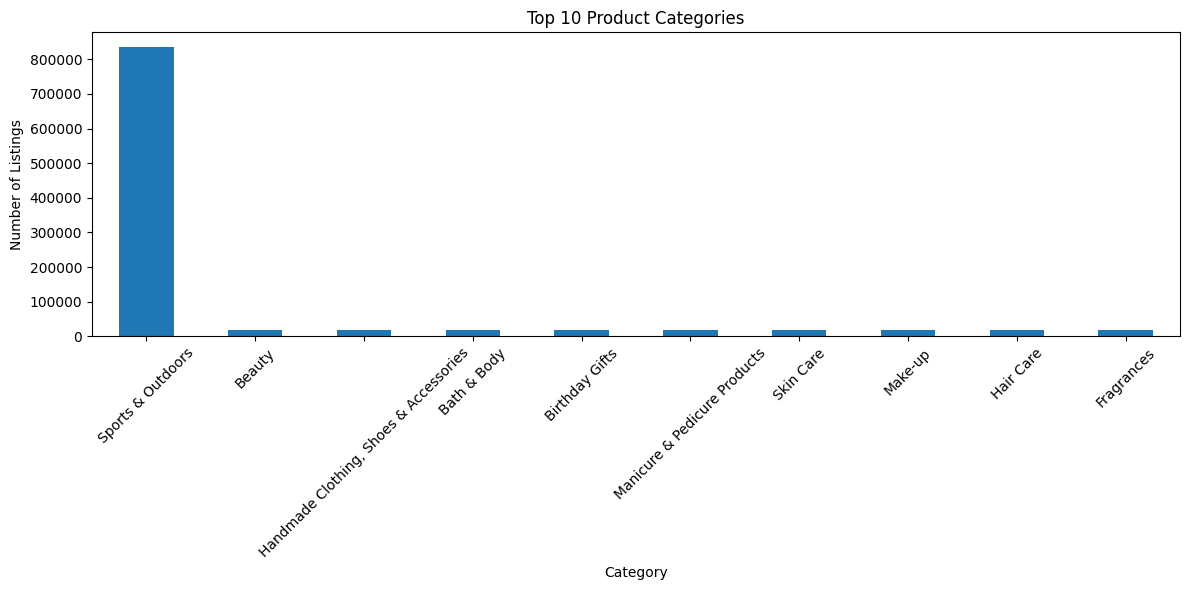

In [ ]:
##Gráfica de barras - Todas las categorías

plt.figure(figsize=(12, 6))
category_counts.head(10).plot(kind='bar')
plt.title('Top 10 Product Categories')
plt.ylabel('Number of Listings')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

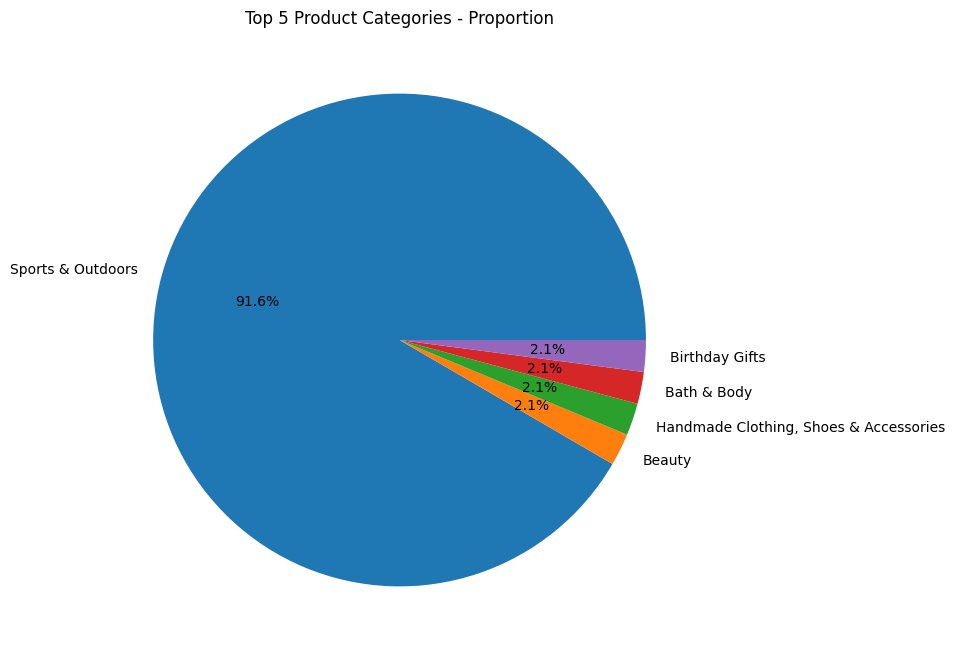

In [8]:
## Pie Chart de proporciones
plt.figure(figsize=(8, 8))
top_5_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Product Categories - Proportion')
plt.ylabel('')
plt.show()

In [ ]:
#Parte 2: Product Pricing

#¿Cómo están distribuidos los precios? ¿Qué medidas resumen podemos calcular?

In [13]:
## Medidas de centralidad

prices = df['price'].dropna()

mean_price = prices.mean()
median_price = prices.median()
mode_price = prices.mode()[0]

print(mean_price)
print(median_price)
print(mode_price)

89.24380943923663
19.09
9.99


In [14]:
## Medidas de dispesión

variance = prices.var()
std_dev = prices.std()
price_range = prices.max() - prices.min()
iqr = prices.quantile(0.75) - prices.quantile(0.25)

print(variance)
print(std_dev)
print(price_range)
print(iqr)

119445.48532254907
345.60886175349884
100000.0
36.0


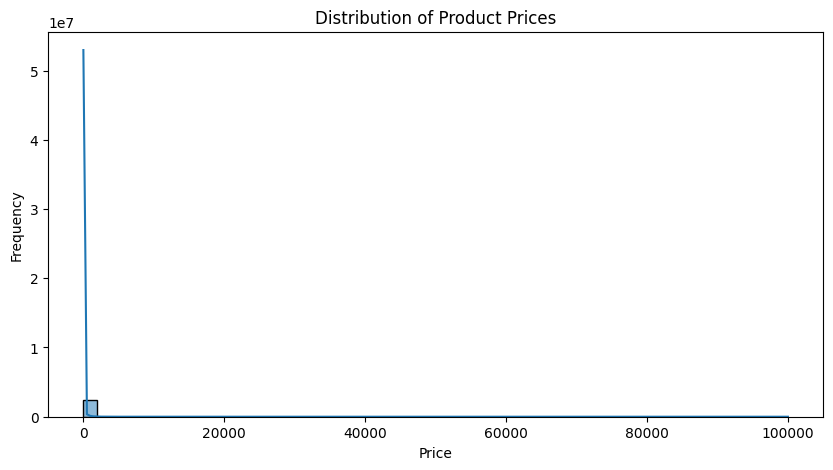

In [15]:
## Hisograma de precios

plt.figure(figsize=(10, 5))
sns.histplot(prices, bins=50, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

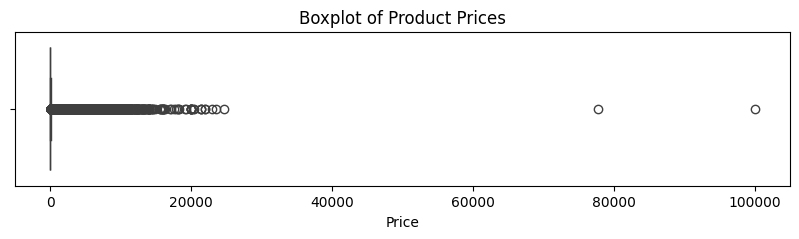

In [ ]:
## Boxplot para ver outliers

plt.figure(figsize=(10, 2))
sns.boxplot(x=prices)
plt.title('Boxplot of Product Prices')
plt.xlabel('Price')
plt.show()

In [ ]:
#PARTE 3: Product Ratings
# ¿Cómo califican los clientes los productos?

In [18]:
## Medidas de centralidad

ratings = df['stars'].dropna()

mean_rating = ratings.mean()
median_rating = ratings.median()
mode_rating = ratings.mode()[0]

print(mean_rating, median_rating, mode_rating)

2.152836472966065 0.0 0.0


In [19]:
## Medidas de dispersión

var_rating = ratings.var()
std_rating = ratings.std()
iqr_rating = ratings.quantile(0.75) - ratings.quantile(0.25)

print(var_rating, std_rating, iqr_rating)

4.817434029796862 2.1948653785134207 4.4


In [21]:
## Forma de la distribucion

skew = stats.skew(ratings)
kurtosis = stats.kurtosis(ratings)

print(skew, kurtosis)

0.08120730776283354 -1.926004642549839


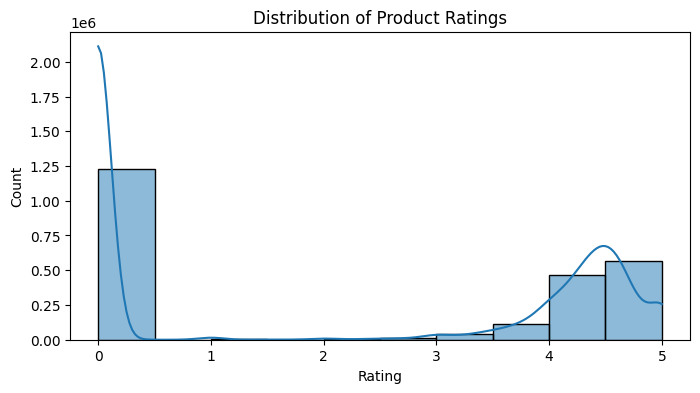

In [22]:
## Hisitograma de ratings

plt.figure(figsize=(8, 4))
sns.histplot(ratings, bins=10, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()